# Titanic survival predictor

Framing the problem


I am tasked to predict whether a passenger survived or not. 
This is a binary classification problem.

The dataset consists of various features (e.g., age, gender, class, ticket, port of embarkment).

My chosen classifiers were the logistic regression model, and K Nearest neighbour

In [325]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



In [326]:
# UPLOAD THE TRAIN AND TEST CSV FILES
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [327]:
# CHECK INFO
train.info()
# test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  1 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [328]:
# eliminate unnamed column
train = train.drop('Unnamed: 12', axis=1)

In [329]:
# CHECK MISSING VALUES AND NULLS
# train.isnull().sum()
# test.isnull().sum()

Imputation: Train (Age, Fare, Embarked), Test (Age, Fare)

In [330]:
# TRAIN DATASET

# Replace empty cells of column 'Age' with the median
# Calculate the median of the 'Age' column
age_median = train['Age'].median()
# Replace missing values with the median
train['Age'].fillna(age_median, inplace=True)

# Replace empty cells of column 'Fare' with the median
# Calculate the median of the 'Fare' column
fare_median = train['Fare'].median()
train['Fare'].fillna(fare_median, inplace=True)

## Replace empty cells of column 'Embarked' with the mode
mode_train_embarked = train['Embarked'].mode()
train['Embarked'].fillna(mode_train_embarked, inplace= True)
# train.isnull().sum()
# train.info()
# embarked_data_type = train['Embarked'].dtype
# embarked_data_type

##########################################################
# TEST DATASET

# Replace empty cells of column 'Age' with the median
# Calculate the median of the 'Age' column
age_median = test['Age'].median()
test['Age'].fillna(age_median, inplace=True)

# Replace empty cells of column 'Fare' with the median
# Calculate the median of the 'Fare' column
fare_median = test['Fare'].median()
test['Fare'].fillna(fare_median, inplace=True)
# test.info()


Insert column Survived in test dataset

In [331]:
# Ister column Survived in test dataset
test.insert(1,'Survived', train['Survived'])

In [332]:
# Replace empty cells in 'Embarked' column with 'S'
train['Embarked'].fillna('S', inplace=True)


Encoding

In [333]:
# TRAIN DATASET

# label encoding to change Embarked values, C, Q, S into dummies
label_encoder = preprocessing.LabelEncoder()
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])

# label encoding to change Gender values male, female into dummies
train['Gender'] = label_encoder.fit_transform(train['Gender'])

#############################
# TEST DATASET

# label encoding to change Embarked values, C, Q, S into dummies
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

# label encoding to change Gender values male, female into dummies
test['Gender'] = label_encoder.fit_transform(test['Gender'])
# train.info()
# test.info()

# train.isnull().sum()
# test.isnull().sum()

# Key statistics

In [334]:
# Describe specific columns
specific_columns = ['Age', 'Fare']  # Replace with the columns you want to describe
description = train[specific_columns].describe()

# Round the summary statistics to two decimal places
rounded_description = description.round(2)

print(rounded_description)

          Age    Fare
count  891.00  891.00
mean    29.36   32.20
std     13.02   49.69
min      0.42    0.00
25%     22.00    7.91
50%     28.00   14.45
75%     35.00   31.00
max     80.00  512.33


In [335]:
specific_columns = ['Age', 'Fare']  # Replace with the columns you want to describe

# Group the data by 'Gender' and calculate statistics for specific columns
grouped_description = train.groupby('Gender')[specific_columns].describe()

# Round the summary statistics to two decimal places
rounded_description = grouped_description.round(2)

print(rounded_description)

          Age                                               Fare         \
        count   mean    std   min   25%   50%   75%   max  count   mean   
Gender                                                                    
0       314.0  27.93  12.86  0.75  21.0  28.0  35.0  63.0  314.0  44.48   
1       577.0  30.14  13.05  0.42  23.0  28.0  35.0  80.0  577.0  25.52   

                                                 
          std   min    25%   50%    75%     max  
Gender                                           
0       58.00  6.75  12.07  23.0  55.00  512.33  
1       43.14  0.00   7.90  10.5  26.55  512.33  


In [336]:
# Calculate the number of females and males
num_females = len(train[train['Gender'] == 0])
num_males = len(train[train['Gender'] == 1])
total_people = len(train)

# Calculate the percentages
percentage_females = (num_females / total_people) * 100
percentage_males = (num_males / total_people) * 100

# Create the sentence
sentence = f"There were {num_females} females ({percentage_females:.2f}%) and {num_males} males ({percentage_males:.2f}%) in the dataset."

print(sentence)


There were 314 females (35.24%) and 577 males (64.76%) in the dataset.


In [337]:
survivors = train['Survived'].value_counts(normalize= True)
female_survivors = train[train['Gender'] == 0]['Survived'].value_counts(normalize= True)
male_survivors = train[train['Gender'] == 1]['Survived'].value_counts(normalize= True)
results = [survivors.round(2), female_survivors.round(2), male_survivors.round(2)]

# Create a DataFrame with the desired column names
table = pd.DataFrame(results).T
table.columns = ['Survived', 'Female Survivors', 'Male Survivors']
table.index.name = 'Proportion'

print(table)

            Survived  Female Survivors  Male Survivors
Proportion                                            
0               0.62              0.26            0.81
1               0.38              0.74            0.19


In [338]:
# create table for Passenger class
female_survivors = train[train['Gender'] == 0]['Pclass'].value_counts(normalize= True).loc[[1, 2, 3]]
male_survivors = train[train['Gender'] == 1]['Pclass'].value_counts(normalize= True).loc[[1, 2, 3]]
results = [female_survivors.round(2), male_survivors.round(2)]

# Create a DataFrame with the desired column names
table = pd.DataFrame(results).T
table.columns = ['  Female', '  Male']
table.index.name = 'Proportion'

print(table)

              Female    Male
Proportion                  
1               0.30    0.21
2               0.24    0.19
3               0.46    0.60


# EDA
How many survived? by gender?

What was the Age feature distribution

What was the breakdown of passengers per class and according to gender

Within each class who survived and who didn't

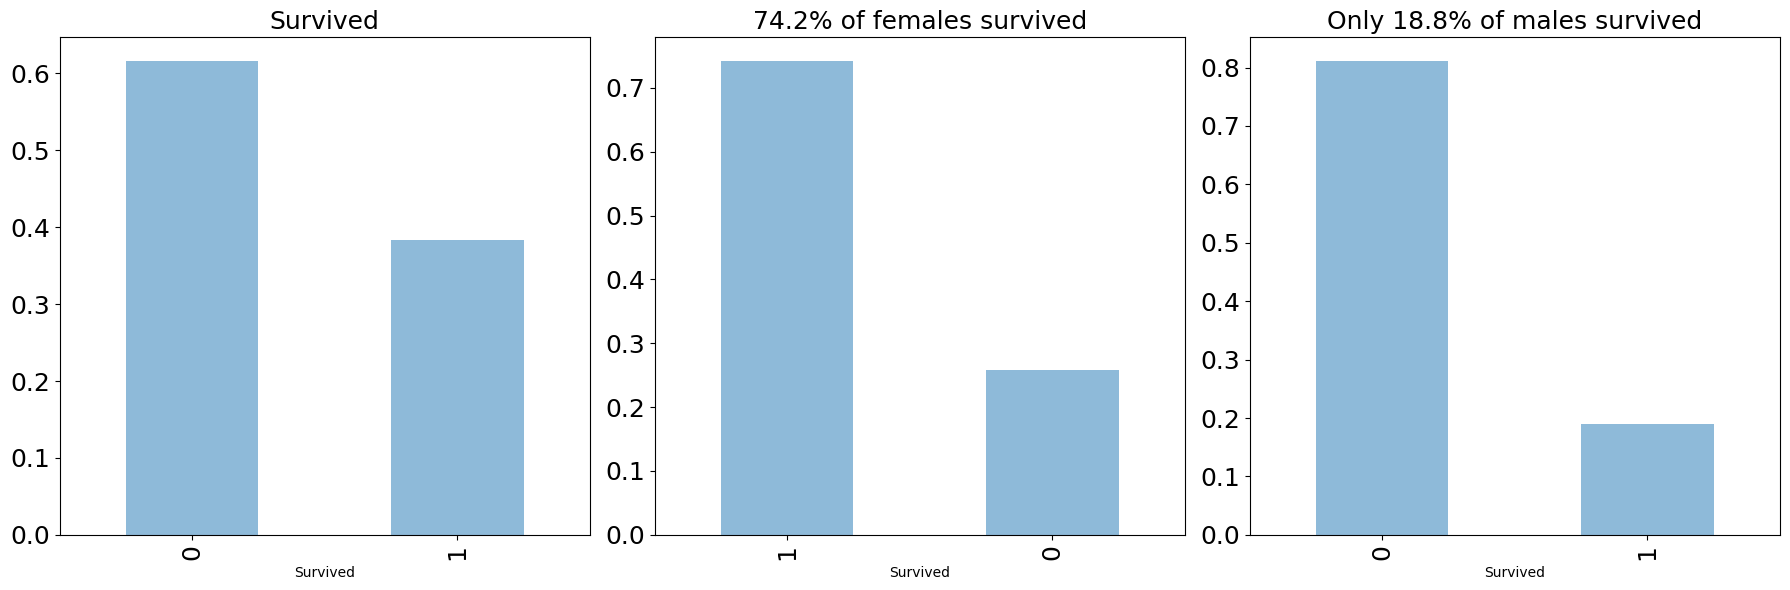

In [339]:
fig = plt.figure(figsize=(18, 6))

# 1. Bar chart with survivors (how many survived, how many didn't)
plt.subplot2grid((1, 3), (0, 0))
train.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5, fontsize = 18)
plt.title("Survived", fontsize = 18)
plt.grid(False)

# 2. Bar chart showing who survived among females
plt.subplot2grid((1, 3), (0, 1))
train.Survived[train.Gender == 0].value_counts(normalize=True).plot(kind="bar", alpha=0.5, fontsize = 18)
plt.title("74.2% of females survived", fontsize = 18)
plt.grid(False)

# 3. Bar chart showing who survived among males
plt.subplot2grid((1, 3), (0, 2))
train.Survived[train.Gender == 1].value_counts(normalize=True).plot(kind="bar", alpha=0.5, fontsize = 18)
plt.title("Only 18.8% of males survived", fontsize = 18)
plt.grid(False)

plt.tight_layout()
plt.show()


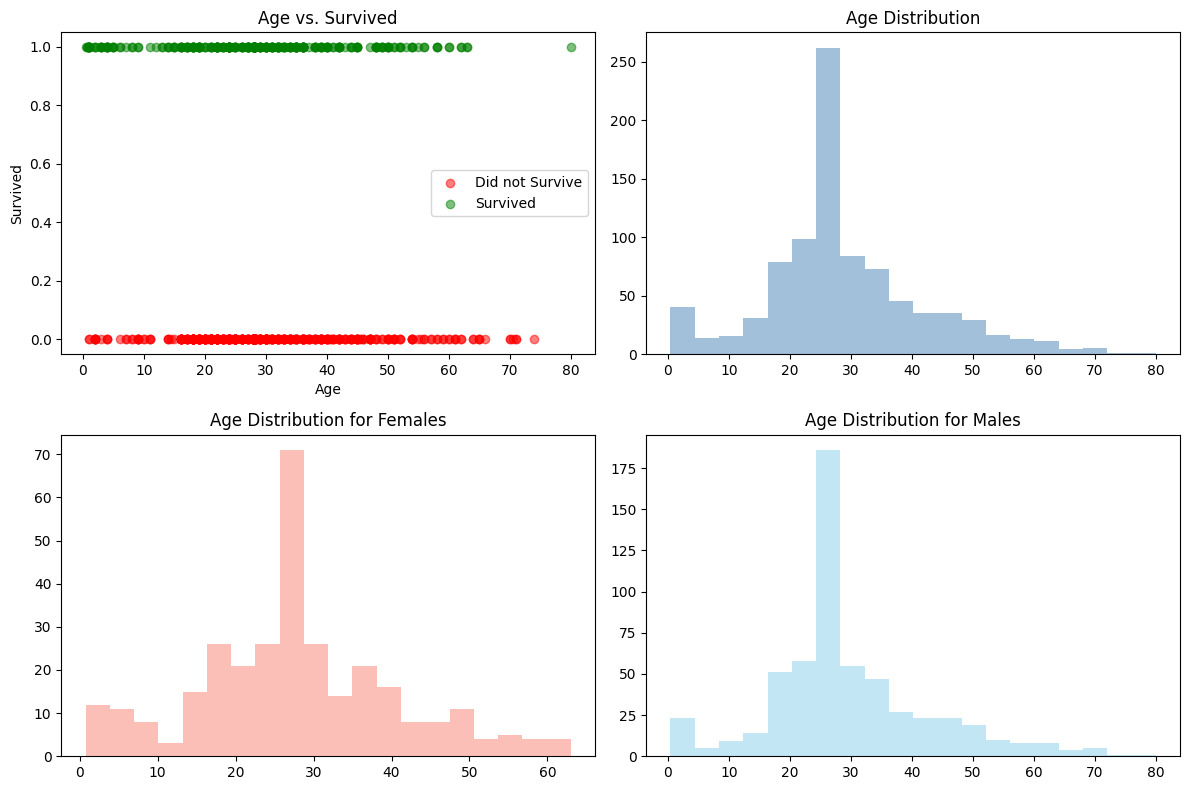

In [340]:
import matplotlib.pyplot as plt

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Scatter plot of age depending on the 'Survived' column (0 and 1)
axes[0, 0].scatter(train['Age'][train['Survived'] == 0], train['Survived'][train['Survived'] == 0], label='Did not Survive', color='red', alpha=0.5)
axes[0, 0].scatter(train['Age'][train['Survived'] == 1], train['Survived'][train['Survived'] == 1], label='Survived', color='green', alpha=0.5)
axes[0, 0].set_title('Age vs. Survived')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Survived')
axes[0, 0].legend()
axes[0, 0].grid(False)

# 2. Histogram for the "Age" column
axes[0, 1].hist(train['Age'], bins=20, color='steelblue', alpha=0.5)
axes[0, 1].set_title('Age Distribution')
axes[0, 1].grid(False)

# 3. Histogram for age if sex is female
axes[1, 0].hist(train['Age'][train['Gender'] == 0], bins=20, color='salmon', alpha=0.5)
axes[1, 0].set_title('Age Distribution for Females')
axes[1, 0].grid(False)

# 4. Histogram for age if sex is male
axes[1, 1].hist(train['Age'][train['Gender'] == 1], bins=20, color='skyblue', alpha=0.5)
axes[1, 1].set_title('Age Distribution for Males')
axes[1, 1].grid(False)
plt.tight_layout()
plt.show()


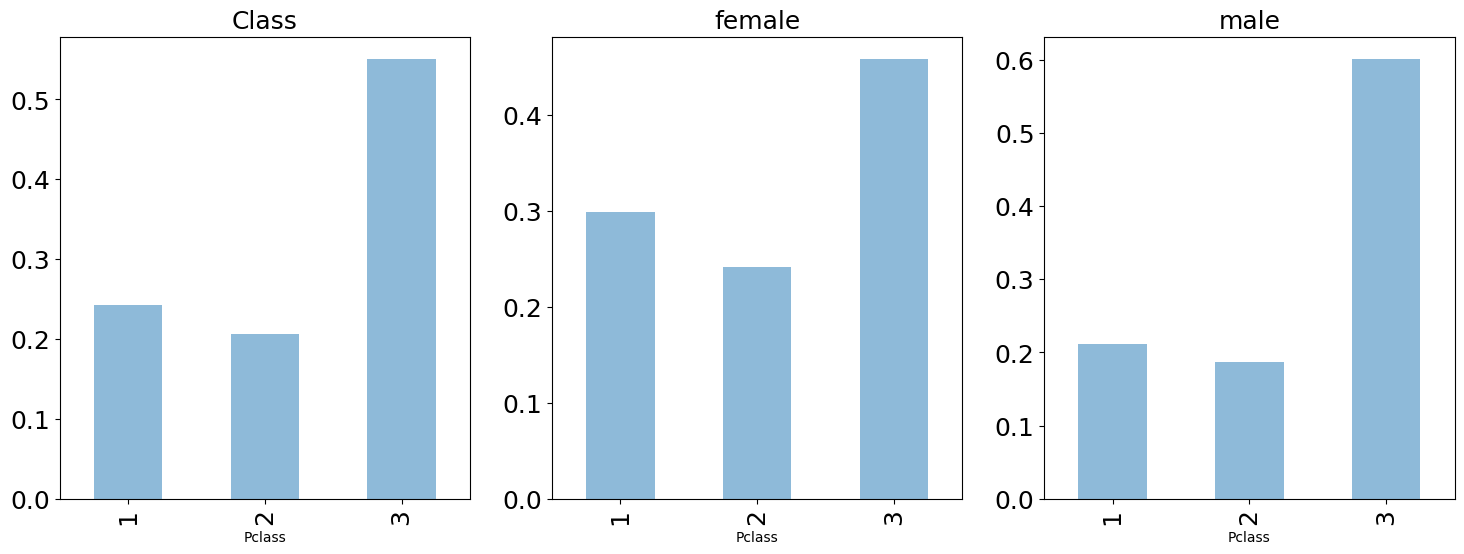

In [341]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Bar chart with survivors per class (how many survived, how many didn't)
train.Pclass.value_counts(normalize=True).loc[[1, 2, 3]].plot(kind="bar", alpha=0.5, fontsize=18, ax=axes[0])
axes[0].set_title("Class", fontsize=18)
axes[0].grid(False)

# 2. Bar chart showing who survived among females
train.Pclass[train.Gender == 0].value_counts(normalize=True).loc[[1, 2, 3]].plot(kind="bar", alpha=0.5, fontsize=18, ax=axes[1])
axes[1].set_title("female", fontsize=18)
axes[1].grid(False)

# 3. Bar chart showing who survived among males
train.Pclass[train.Gender == 1].value_counts(normalize=True).loc[[1, 2, 3]].plot(kind="bar", alpha=0.5, fontsize=18, ax=axes[2])
axes[2].set_title("male", fontsize=18)
axes[2].grid(False)

plt.show()


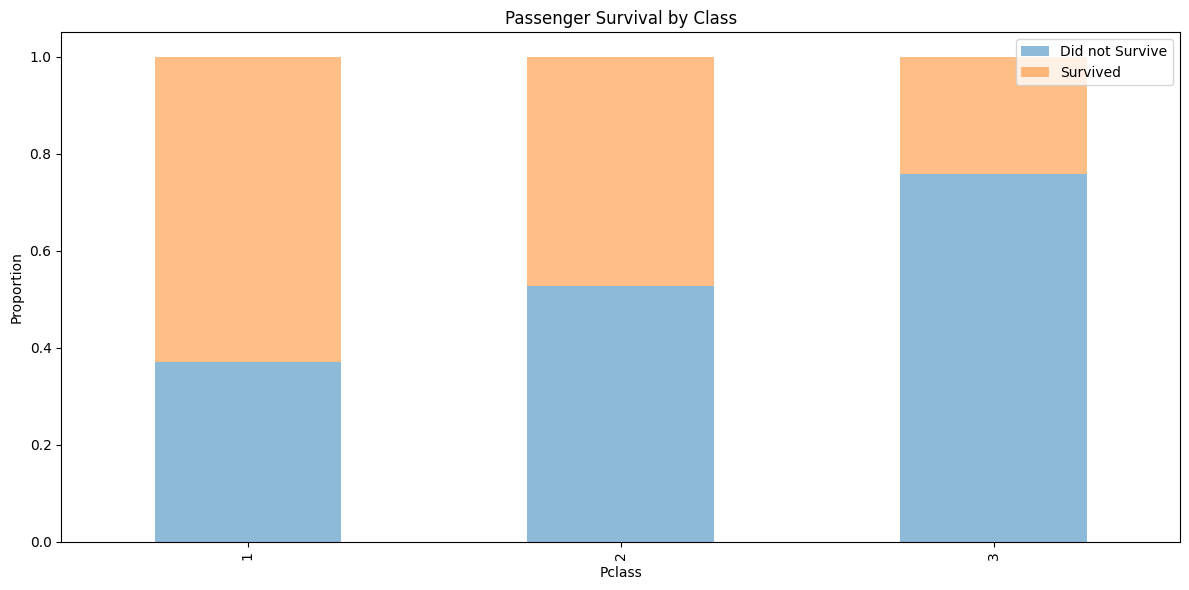

In [342]:
# Create a figure with a 1x1 grid
fig = plt.figure(figsize=(12, 6))

# 1. Subplot: Bar chart with survivors and passengers per class
ax1 = plt.subplot2grid((1, 1), (0, 0))

# Group data by Pclass and calculate proportions
proportions = train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Create the bar chart
proportions.plot(kind="bar", stacked=True, alpha=0.5, ax=ax1)
ax1.set_title("Passenger Survival by Class")
ax1.set_xlabel("Pclass")
ax1.set_ylabel("Proportion")
ax1.legend(['Did not Survive', 'Survived'], loc='upper right')

plt.tight_layout()
plt.show()


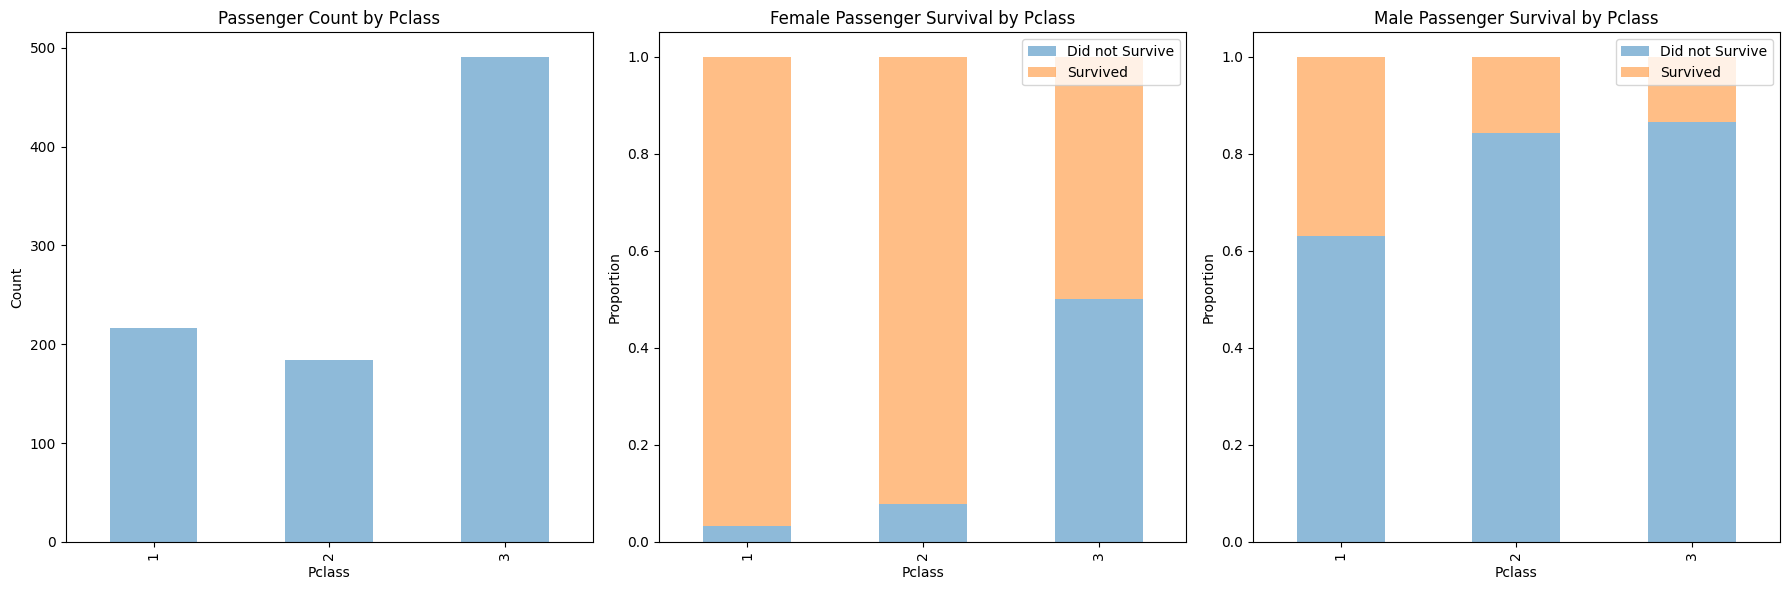

In [343]:
# Create a figure with a 1x1 grid
fig = plt.figure(figsize=(18, 6))

# 1. Subplot: Bar chart with the number of passengers in each class
ax1 = plt.subplot2grid((1, 3), (0, 0))

# Group data by Class and calculate the total number of passengers in each class
passenger_counts = train['Pclass'].value_counts()

# Create the bar chart for total passengers
passenger_counts.loc[[1, 2, 3]].plot(kind="bar", alpha=0.5, ax=ax1)
ax1.set_title("Passenger Count by Pclass")
ax1.set_xlabel("Pclass")
ax1.set_ylabel("Count")

# 2. Subplot: Bar chart with survivors by Class for females (Gender == 0)
ax2 = plt.subplot2grid((1, 3), (0, 1))

# Filter the data for females
female_data = train[train['Gender'] == 0]

# Group data by Class and calculate proportions for females
female_proportions = female_data.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Create the bar chart for females
female_proportions.plot(kind="bar", stacked=True, alpha=0.5, ax=ax2)
ax2.set_title("Female Passenger Survival by Pclass")
ax2.set_xlabel("Pclass")
ax2.set_ylabel("Proportion")
ax2.legend(['Did not Survive', 'Survived'], loc='upper right')

# 3. Subplot: Bar chart with survivors by Class for males (Gender == 1)
ax3 = plt.subplot2grid((1, 3), (0, 2))

# Filter the data for males
male_data = train[train['Gender'] == 1]

# Group data by Class and calculate proportions for males
male_proportions = male_data.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Create the bar chart for males
male_proportions.plot(kind="bar", stacked=True, alpha=0.5, ax=ax3)
ax3.set_title("Male Passenger Survival by Pclass")
ax3.set_xlabel("Pclass")
ax3.set_ylabel("Proportion")
ax3.legend(['Did not Survive', 'Survived'], loc='upper right')

plt.tight_layout()
plt.show()


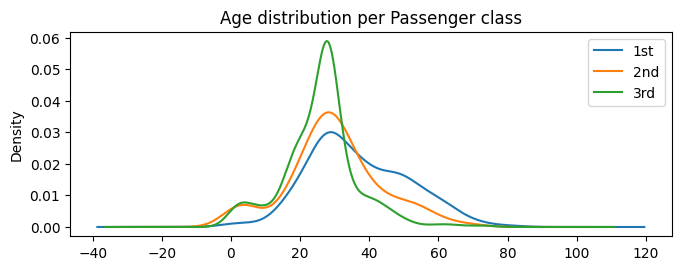

In [344]:
# KERNEL DENSITY
# Create a larger figure with subplots
fig = plt.figure(figsize=(10, 5))

plt.subplot2grid((2,3), (1,0), colspan = 2)
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind = 'kde')
plt.title("Age distribution per Passenger class")
plt.legend(("1st", "2nd", "3rd"))
 
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()



# Machine learning

In [345]:
#  Since we are dealing with a binary outcome we will conduct build our predictor with
# a/ logistic regression and b/ K Nearest neighbors

# First let's split the data into dependant and indep variables for the train and test datasets
# Train features
x_train = train.drop(['Survived', "PassengerId","Name",'Ticket','Cabin'], axis=1)
y_train = train['Survived']

# Testfeatures
X_test = test.drop(['Survived', "PassengerId","Name",'Ticket','Cabin'], axis=1)
Y_test =test['Survived']

In [346]:
# X_test.info()
# x_train.info()

# x_train.head()
X_test.head()


,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [347]:
x_train.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


# Heuristic model

In [348]:
# Gender based survival probability
train["Demo"] = 0 # create a demo column
train.loc[train["Gender"] == 0, "Demo"] = 1 # Assign 1 to Demo if gender is female

train["Result"] = 0 # create a new column
train.loc[train["Survived"] == train["Demo"], "Result"] =1  #  if survived = hyp then result = 1
print(train["Result"].value_counts(normalize=True))


Result
1    0.786756
0    0.213244
Name: proportion, dtype: float64


# Logistic regression

In [349]:
# Define features and target
target = train["Survived"].values
features = train.drop(['Survived', "PassengerId", "Name", 'Ticket', 'Cabin'], axis=1).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=32)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train) # scaling training set
X_test = scaler_X.fit_transform(X_test) # scaling test set

# Create a logistic regression model
classifier = LogisticRegression(random_state= 0, max_iter= 1000)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on test data
predictions = classifier.predict(X_test)

In [350]:
# we need to assess how y_test and predictions look 
train =pd.DataFrame({"actual target y_test": y_test.flatten(), "Predictions": np.round(predictions.flatten(),2)})

# train['Difference'] = round((train['actual target y_test'] - train['Predictions']))

# Print the updated DataFrame
print(train)

     actual target y_test  Predictions
0                       0            0
1                       1            1
2                       1            1
3                       0            0
4                       0            0
..                    ...          ...
218                     0            0
219                     1            1
220                     1            0
221                     1            0
222                     1            1

[223 rows x 2 columns]


In [351]:
# PERFORMANCE METRICS
# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, predictions), 4)
print("Logistic Regression Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print("Accuracy from confusion matrix:", accuracy_from_confusion)

Logistic Regression Accuracy: 0.7848
Accuracy from confusion matrix: 0.7848


In [352]:
# train.drop(['Difference'], axis=1, inplace=True)
print(train.columns)



Index(['actual target y_test', 'Predictions'], dtype='object')


# K-Nearest neighbors

In [353]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=32)

# Create a K-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),4)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7318


# Thank you !